In [1]:
import numpy as np

In [ ]:
x_train = np.load('x_train.npy',allow_pickle=True)
x_test = np.load('x_test.npy',allow_pickle=True)
y_train = np.load('y_train.npy',allow_pickle=True)
y_test = np.load('y_test.npy',allow_pickle=True)

In [3]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(17835, 128, 128, 3) (17835, 15) (4459, 128, 128, 3) (4459, 15)


In [4]:
import numpy as np
from keras.layers import Conv2D , Dense , Activation , MaxPool2D ,Flatten , BatchNormalization , Dropout
from keras.models import Sequential

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [25]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = (128,128,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(15))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_19 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_20 (Activation)   (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)       73856     
__________

In [26]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

In [27]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)
callback_early_stop_reduceLROnPlateau=[earlyStopping]

In [28]:
#Randomly Initializing Wights
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [29]:
# Training
hist = model.fit(x_train , y_train,
         shuffle=True,
         epochs = 40,
         batch_size=128,
         validation_data=(x_test,y_test),
         callbacks=callback_early_stop_reduceLROnPlateau)

Train on 17835 samples, validate on 4459 samples
Epoch 1/40
17835/17835 [==============================] - 89s 5ms/step - loss: 1.5518 - acc: 0.5109 - val_loss: 0.7674 - val_acc: 0.7690
Epoch 2/40
17835/17835 [==============================] - 87s 5ms/step - loss: 0.6452 - acc: 0.7906 - val_loss: 0.5179 - val_acc: 0.8309
Epoch 3/40
17835/17835 [==============================] - 91s 5ms/step - loss: 0.4389 - acc: 0.8598 - val_loss: 0.4303 - val_acc: 0.8538
Epoch 4/40
17835/17835 [==============================] - 92s 5ms/step - loss: 0.3008 - acc: 0.9056 - val_loss: 0.2782 - val_acc: 0.9110
Epoch 5/40
17835/17835 [==============================] - 93s 5ms/step - loss: 0.2111 - acc: 0.9332 - val_loss: 0.3256 - val_acc: 0.8863
Epoch 6/40
17835/17835 [==============================] - 94s 5ms/step - loss: 0.1538 - acc: 0.9542 - val_loss: 0.2265 - val_acc: 0.9246
Epoch 7/40
17835/17835 [==============================] - 97s 5ms/step - loss: 0.1105 - acc: 0.9687 - val_loss: 0.2136 - val_acc:

In [31]:
import matplotlib.pyplot as plt

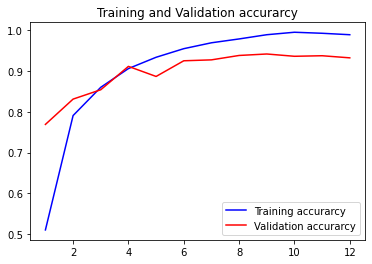

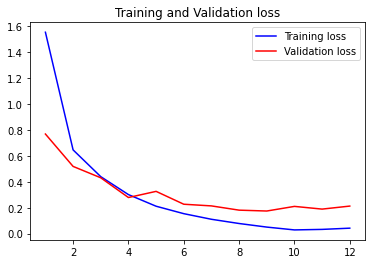

In [32]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [36]:
print("model accuracy")
scores = model.evaluate(x_test, y_test)
print('Accuracy :- ' , scores[1] , ' , Loss :- ' , scores[0])

model accuracy
4459/4459 [==============================] - 6s 1ms/step
Accuracy :-  0.9412424310383494  , Loss :-  0.17414792275369956


In [38]:
preds = model.predict(x_test)
preds.shape

(4459, 15)

In [39]:
yhat = [np.argmax(i) for i in preds]

In [45]:
np.shape(yhat)

(4459,)

In [51]:
actual_output = [np.argmax(i) for i in y_test]

In [60]:
from sklearn.metrics import confusion_matrix , consensus_score , classification_report
import seaborn as sns

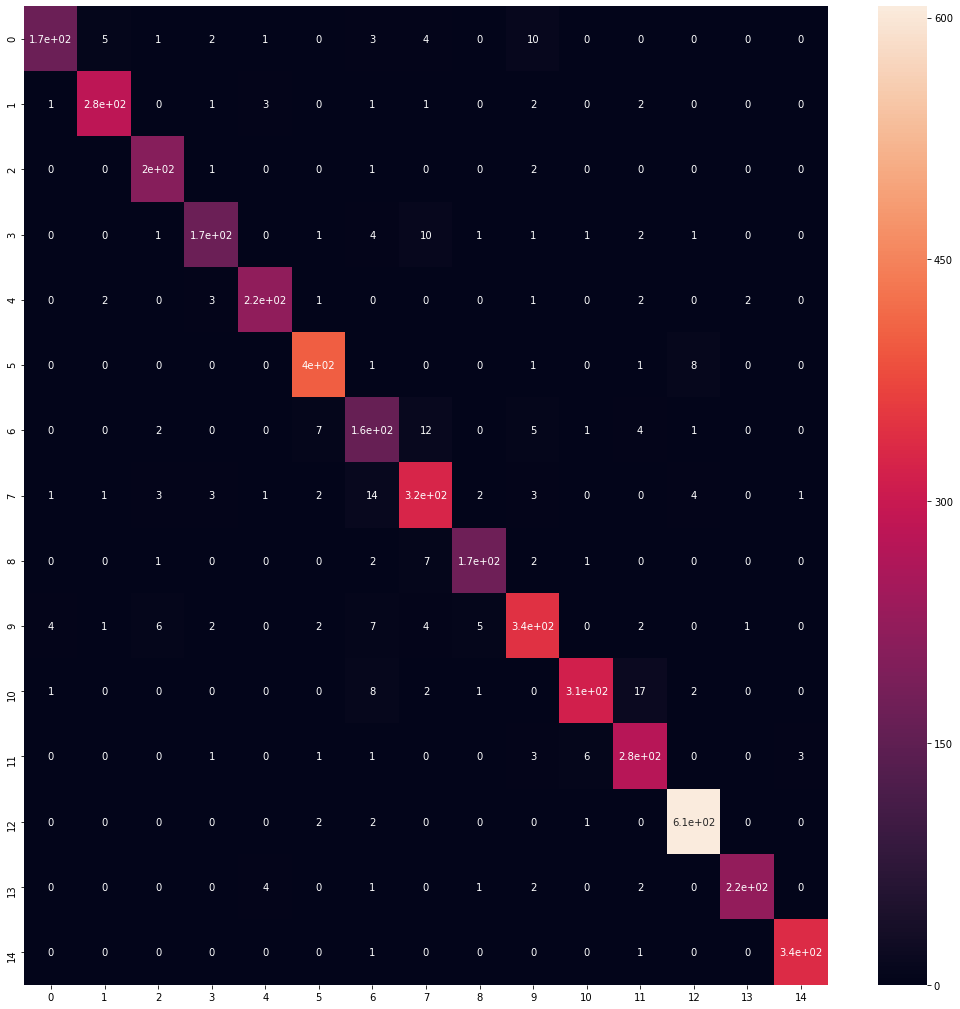

In [67]:
plt.figure(figsize=(18,18))
confusion = confusion_matrix(actual_output,yhat)
sns.heatmap(confusion, annot=True , xticklabels=True , yticklabels=True)

In [56]:
print("Confusion Matrix \n")
print(confusion_matrix(actual_output,yhat),'\n')
print('\n Classification Report\n')
print(classification_report(actual_output,yhat))

Confusion Matrix 

[[166   5   1   2   1   0   3   4   0  10   0   0   0   0   0]
 [  1 283   0   1   3   0   1   1   0   2   0   2   0   0   0]
 [  0   0 204   1   0   0   1   0   0   2   0   0   0   0   0]
 [  0   0   1 168   0   1   4  10   1   1   1   2   1   0   0]
 [  0   2   0   3 220   1   0   0   0   1   0   2   0   2   0]
 [  0   0   0   0   0 401   1   0   0   1   0   1   8   0   0]
 [  0   0   2   0   0   7 159  12   0   5   1   4   1   0   0]
 [  1   1   3   3   1   2  14 325   2   3   0   0   4   0   1]
 [  0   0   1   0   0   0   2   7 171   2   1   0   0   0   0]
 [  4   1   6   2   0   2   7   4   5 345   0   2   0   1   0]
 [  1   0   0   0   0   0   8   2   1   0 314  17   2   0   0]
 [  0   0   0   1   0   1   1   0   0   3   6 275   0   0   3]
 [  0   0   0   0   0   2   2   0   0   0   1   0 607   0   0]
 [  0   0   0   0   4   0   1   0   1   2   0   2   0 224   0]
 [  0   0   0   0   0   0   1   0   0   0   0   1   0   0 335]] 


 Classification Report

        

In [ ]:
Fpr = dict()
Tpr = dict()

# y_test = to_categorical(y_test)
# yhat = to_categorical(yhat)
lw = 1

Roc_auc = dict()
for i in range(15):
    Fpr[i], Tpr[i], _ = roc_curve(y_test[:, i],preds[:, i])
    Roc_auc[i] = auc(Fpr[i], Tpr[i])
    
    
Fpr["micro"], Tpr["micro"], _ = roc_curve(y_test.ravel(), preds.ravel())
Roc_auc["micro"] = auc(Fpr["micro"], Tpr["micro"])


all_Fpr = np.unique(np.concatenate([Fpr[i] for i in range(15)]))

mean_Tpr = np.zeros_like(all_Fpr)
for i in range(15):
    mean_Tpr += interp(all_Fpr, Fpr[i], Tpr[i])

mean_Tpr /= 15

Fpr["macro"] = all_Fpr
Tpr["macro"] = mean_Tpr
Roc_auc["macro"] = auc(Fpr["macro"], Tpr["macro"])

plt.figure(1)
plt.plot(Fpr["micro"], Tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(Fpr[i], Tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, Roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (micro) for RGB')
plt.legend(loc="lower right")
plt.show()